# Spam SMS Detection

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('spam.csv', encoding='latin1')

In [3]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
data.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [6]:
data.shape

(5572, 5)

In [7]:
data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
v1            5572 non-null object
v2            5572 non-null object
Unnamed: 2    50 non-null object
Unnamed: 3    12 non-null object
Unnamed: 4    6 non-null object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace = True)

In [10]:
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
encoder=LabelEncoder()

In [13]:
data['v1']=encoder.fit_transform(data['v1'])

In [14]:
data.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
data.isna().sum()

v1    0
v2    0
dtype: int64

In [16]:
data.duplicated().sum()

403

In [17]:
data=data.drop_duplicates(keep='first')

In [18]:
data.duplicated().sum()

0

In [19]:
data.shape

(5169, 2)

In [20]:
data['v1'].value_counts()

0    4516
1     653
Name: v1, dtype: int64

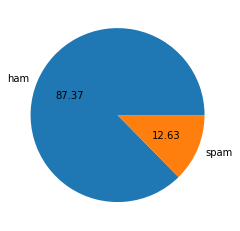

In [22]:
import matplotlib.pyplot as plt
plt.pie(data['v1'].value_counts(), labels=['ham','spam'], autopct='%0.2f')
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [24]:
X = data['v2']
y = data['v1']

##  Splitting the dataset into training and testing sets

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
vectorizer = TfidfVectorizer(stop_words="english", max_df=0.95)
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)

# Model Training

## Naive Bayes

In [27]:
cl = MultinomialNB()
cl.fit(X_train_transformed, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [28]:
y_pred = cl.predict(X_test_transformed)

In [29]:
print("Accuracy Of Model Is :", accuracy_score(y_test, y_pred)*100)

Accuracy Of Model Is : 96.61508704061895


## Logistic regression

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
cl2 = LogisticRegression(solver='liblinear')

In [32]:
cl2.fit(X_train_transformed, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
y_pred = cl2.predict(X_test_transformed)

In [34]:
print("Accuracy:", accuracy_score(y_test, y_pred)*100)

Accuracy: 96.42166344294004


## Accuracy using Logistic Regression = 96.42
## Accuracy using Naive Bayes classifier = 96.61